# Assignment 3

 In this Assignment, we will use CNN to classify digits.   
The `MNIST` database is a large database of handwritten digits that is commonly used for training various image processing systems.



## Importing TensorFlow

In [33]:
import tensorflow as tf

## Get the dataset

In [34]:
# Import the dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [35]:
# Split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_test,y_test,test_size=0.2)

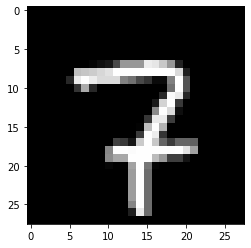

In [36]:
# Pre processing 
import matplotlib.pyplot as plt
plt.imshow(X_train[7], cmap="gray") # Import the image
plt.show()

In [37]:
# Normalize the train dataset
X_train = tf.keras.utils.normalize(X_train, axis=1)
# Normalize the test dataset
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [38]:
print(X_train.shape, Y_train.shape)

(8000, 28, 28) (8000,)


## Visualize the dataset
Print some images with labels.

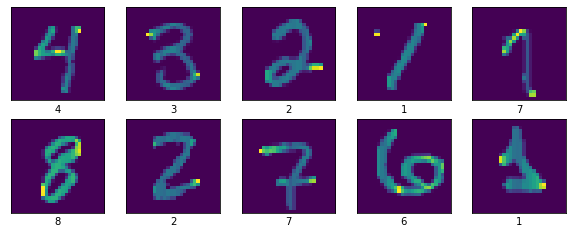

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
   
    plt.xlabel(Y_train[i])
plt.show()
# Your code

Plot statistics of the training and testing dataset  
(`x axis`: digits, `y axis`: number of samples corresponding to the digits)

In [40]:
import numpy as np
import numpy as np
unique, counts = np.unique(Y_train, return_counts=True)
print (np.asarray((unique, counts)).T)



[[  0 813]
 [  1 890]
 [  2 823]
 [  3 811]
 [  4 788]
 [  5 692]
 [  6 769]
 [  7 812]
 [  8 789]
 [  9 813]]


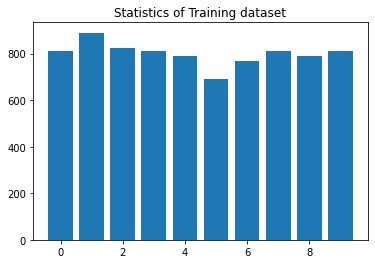

In [41]:
plt.bar(unique,counts)
plt.title("Statistics of Training dataset")
plt.show()

In [42]:
import numpy as np
unique2, counts2 = np.unique(Y_test, return_counts=True)
print (np.asarray((unique2, counts2)).T)

[[  0 167]
 [  1 245]
 [  2 209]
 [  3 199]
 [  4 194]
 [  5 200]
 [  6 189]
 [  7 216]
 [  8 185]
 [  9 196]]


## Model

In [43]:
# model building
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [45]:
# Compile the model (add optimizers and metrics)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# Fit the model on the training data (specify validation_split, read about validation if new to you)
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=15,batch_size=5)


Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1280/1280 [==============================] - 5s 4ms/step - loss: 0.0344 - accuracy: 0.9914 - val_loss: 0.0955 - val_accuracy: 0.9756
Epoch 2/15
1280/1280 [==============================] - 4s 3ms/step - loss: 0.0112 - accuracy: 0.9961 - val_loss: 0.1720 - val_accuracy: 0.9619
Epoch 3/15
1280/1280 [==============================] - 4s 3ms/step - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.1145 - val_accuracy: 0.9725
Epoch 4/15
1280/1280 [==============================] - 4s 3ms/step - loss: 0.0103 - accuracy: 0.9975 - val_loss: 0.1597 - val_accuracy: 0.9694
Epoch 5/15
1280/1280 [==============================] - 4s 3ms/step - loss: 0.0161 - accuracy: 0.9944 - val_loss: 0.1569 - val_accuracy: 0.9737
Epoch 6/15
1280/1280 [==============================] - 4s 3ms/step - loss: 0.0205 - accuracy: 0.9930 - val_loss: 0.2123 - val_accuracy: 0.9594
Epoch 7/15
1280/1280 [==============================] - 4s 3ms/step - loss: 0.0129 - accuracy: 0.9967 - val_loss: 0.1392 - val_accuracy: 0.9719
Epo

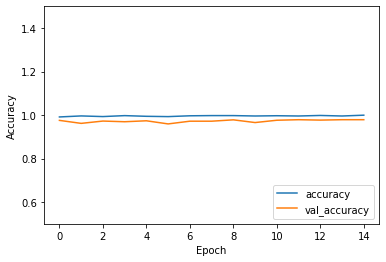

In [46]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.5])
plt.legend(loc='lower right')

In [47]:
test_loss, test_acc = model.evaluate(X_test,Y_test, verbose=2)
print(test_acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


63/63 - 0s - loss: 0.0732 - accuracy: 0.9850 - 265ms/epoch - 4ms/step
0.9850000143051147


## Predict some images
Print the image along with its label (true value) and predicted value.

In [48]:
# Your code
predictions = model.predict(X_test)
for i in range(5):

  print(np.argmax(predictions[i]))

9
7
1
2
9


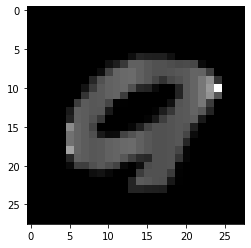

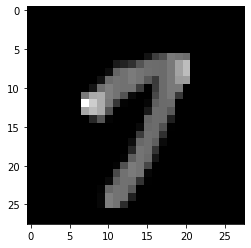

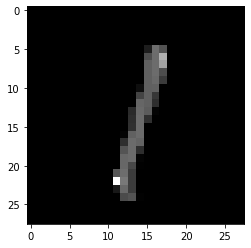

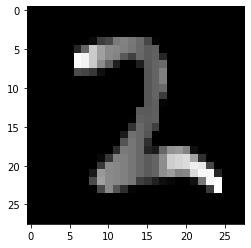

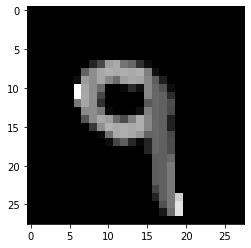

In [49]:
for i in range(5):
  plt.imshow(X_test[i], cmap="gray") # Import the image
  plt.show() # Show the image

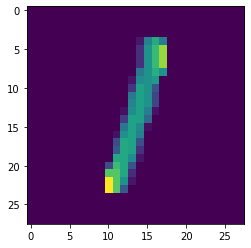

label ->  1
prediction ->  1


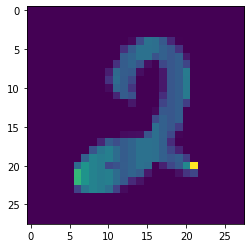

label ->  2
prediction ->  2


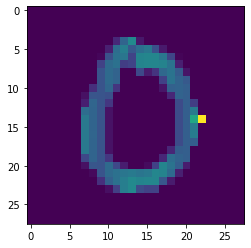

label ->  0
prediction ->  0


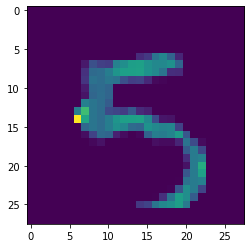

label ->  5
prediction ->  5


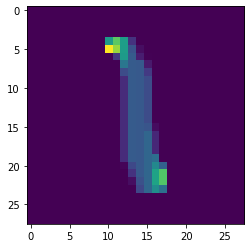

label ->  1
prediction ->  1


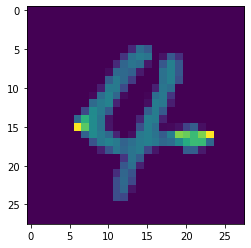

label ->  4
prediction ->  4


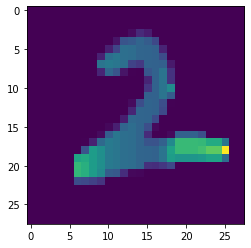

label ->  2
prediction ->  2


In [50]:
predictions=model.predict([X_test])
for i in range(25,32):
  plt.imshow(X_test[i])
  plt.show()
 
  print('label -> ',Y_test[i])
  print('prediction -> ',np.argmax(predictions[i]))
